In [1]:
import os
os.getcwd()

'/Users/vb/Downloads/MTech/PES/NLP/NLP_Yuvaraju'

In [31]:
#!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [32]:
#!tar -xf aclImdb_v1.tar.gz

#Predict the occupancy using classification tecniques
##### Objective:
- Build a classification  model to predict sentiment of the IMDB movie based on its review

### Approach: 
### Here the note book contains 6 sections

- Text Cleaning

- Exploratory Data analysis 

- Text representation
  - TF-IDF
  - Glove
  - BERT
- Applying Machine learning models  
  - Logistic regression
  - SVM
  - Multi Nomial Naïve bayes 
- Deeplearning model
 - LSTM with pretrained Glove
 - LSTM 
 - BERT
 - Conv1D
- Summary
  


## Import all the necessary libraries

In [2]:
!pip install wordcloud

In [34]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

from statistics import mode,mean,median

#text preprocessing
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Keras
import tensorflow as tf
from tensorflow.keras import Model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout,Input
from tensorflow.keras.utils import to_categorical
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM,GlobalMaxPooling1D,BatchNormalization,Bidirectional
from tensorflow.keras.optimizers import Adam


# nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os

[nltk_data] Downloading package stopwords to /Users/vb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vb/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [5]:
import tensorflow as tf

In [ ]:
# !pip install smart_open

In [6]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

IndexError: list index out of range

### Data Directory 

In [7]:
#BASE_DIR=r"C:\Users\rajbo\Downloads\NLP\dataset"

BASE_DIR = os.getcwd()

TRAIN_DATA_DIR=os.path.join(BASE_DIR, 'aclImdb/train')

TEST_DATA_DIR = os.path.join(BASE_DIR, 'aclImdb/test')
TRAIN_DATA_DIR, TEST_DATA_DIR

('/Users/vb/Downloads/MTech/PES/NLP/NLP_Yuvaraju/aclImdb/train',
 '/Users/vb/Downloads/MTech/PES/NLP/NLP_Yuvaraju/aclImdb/test')

In [ ]:
#The following command can be used to unzip the tar.gz file from cmd
# tar -xvzf aclImdb_v1.tar.gz

In [9]:
import pandas as pd

## Loading the data


In [10]:
#Function to load the data from the dataset into the notebook. Will be called twice - for train and test.
def get_data(data_dir):
    texts = []  # list of review samples
    labels_index = {'pos':1, 'neg':0}  # dictionary mapping label name to numeric id
    labels = []  # list of label ids
    for name in sorted(os.listdir(data_dir)):
        if name=='pos' or name=='neg':
            path = os.path.join(data_dir, name)            
            label_id = labels_index[name]
            for fname in sorted(os.listdir(path)):## iterrating the review files
                    fpath = os.path.join(path, fname)
                    text = open(fpath,encoding='utf8').read() #open the file and read
                    texts.append(text)  #append the reviews to text list
                    labels.append(label_id)
    return texts, labels

train_texts, train_labels = get_data(TRAIN_DATA_DIR)
test_texts, test_labels = get_data(TEST_DATA_DIR)
labels_index = {'pos':1, 'neg':0} 

df_train=pd.DataFrame(list(zip(train_texts, train_labels)),columns=['reviews','sentiment'])

df_test=pd.DataFrame(list(zip(test_texts, test_labels)),columns=['reviews','sentiment'])

df=pd.concat([df_train,df_test],axis=0)

In [ ]:
# df_train=pd.DataFrame()

In [11]:
#Print first 5 rows of data
df.sample(5)

reviews  sentiment
16956  Graphics is far from the best part of the game...          1
21946  This movie is great. Stylish, fun, good acting...          1
19240  The world is going to miss John Frankenheimer....          1
4386   I went to see "Quitting" with high hopes, beca...          0
9781   The production values in this video are so poo...          0

In [12]:
print(df['reviews'].iloc[13])

This film is about a male escort getting involved in a murder investigation that happened in the circle of powerful men's wives.<br /><br />I thought "The Walker" would be thrilling and engaging, but I was so wrong. The pacing is painfully and excruciatingly slow, that even after 40 minutes of the film nothing happens much. Seriously, the first hour could be condensed into ten minutes. That's how slow it is.<br /><br />The fact that it lacks any thrills or action scenes aggravates the boredom. It's almost shocking that even argument scenes are so plain and devoid of emotion. Maybe it is because of the stiff upper lip of the higher social class? <br /><br />It's sad that "The Walker" becomes such a boring mess, despite such a strong cast. Blame it on the poor plot and even worse pacing.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [14]:
df['sentiment']=df['sentiment'].astype('category')

In [15]:
df.describe() #descriptive statistics

reviews  sentiment
count                                               50000      50000
unique                                              49582          2
top     Loved today's show!!! It was a variety and not...          0
freq                                                    5      25000

### Checking the null values in the dataset

In [16]:
null_values = df.isnull().sum() #identifying missing values
null_values

reviews      0
sentiment    0
dtype: int64

 - There are no null values in the dataset

### Checking the duplicate values in the dataset

In [17]:
num_duplicates = df.duplicated().sum() #identify duplicates
num_duplicates

418

 - There are 418 duplicate rteviews in the dataset

In [18]:
#view duplicate reviews
review = df['reviews']
duplicated_review = df[review.isin(review[review.duplicated()])].sort_values("reviews")
duplicated_review.head()

reviews sentiment
3814  "Go Fish" garnered Rose Troche rightly or wron...         0
1084  "Go Fish" garnered Rose Troche rightly or wron...         0
8153  "Three" is a seriously dumb shipwreck movie. M...         0
5976  "Three" is a seriously dumb shipwreck movie. M...         0
2552  "Witchery" might just be the most incoherent a...         0

In [19]:
#drop duplicate reviews
df.drop_duplicates(inplace = True)


- duplicate values removed 

In [20]:
#df.to_csv("imdb_reviews.csv",index=False)

## Data Cleaning

In [22]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/vb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

NameError: name 'stopwords' is not defined

In [49]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [51]:
#function to clean data
def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [52]:
df_copy=df.copy()

In [53]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/vb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
#!ls

In [54]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [55]:
!python -m nltk.downloader -d /usr/local/lib/nltk_data

/opt/anaconda3/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [56]:
os.getcwd()

'/Users/vb/Downloads/MTech/PES/NLP/NLP_Yuvaraju'

In [57]:
import sys
print(sys.path.path)

AttributeError: 'list' object has no attribute 'path'

In [58]:
!python -m nltk.downloader wordnet

/opt/anaconda3/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /Users/vb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
!python -m nltk.downloader -d /usr/local/share/nltk_data all

/opt/anaconda3/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagg

[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]

[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Packag

In [60]:
from nltk.corpus import wordnet

In [64]:
clean_text

<function __main__.clean_text(text, lemmatize=True)>

In [66]:
df['reviews']= df['reviews'].apply(clean_text, lemmatize = True)

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/Users/vb/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [86]:
print(df['reviews'].iloc[25000])

far vapid idiotic insanely stupid show ever air coming someone remembers san pedro beach bums wife loves watching reality showsand one episode drivel wannabes develop walk end result straight monty pythons ministry silly walks sketch could laugh hard enough ubiquitous ms banks laughing way annoying selfimportant woman tv since rosie odonnell left view modeling great things mankind please never found attractive find intelligent temerity open mouth someone needs tell human clothes hangers eat healthy diet actually look like real women


In [87]:
print(df_copy['reviews'].iloc[25000])

This is by far the most vapid, idiotic, insanely stupid show that has EVER been on the air, and this is coming from someone who remembers "San Pedro Beach Bums".<br /><br />My wife loves watching reality shows--and there was one episode of this drivel where the wannabes had to develop a "walk". The end result was straight out of Monty Python's "Ministry of Silly Walks" sketch. I couldn't laugh hard enough.<br /><br />And then there's the ubiquitous Ms. Banks (as in laughing all the way to the...). She has to be the most annoying self-important woman on TV since Rosie O'Donnell left "The View". As if modeling was doing great things for mankind. Please. I've never found her attractive, and I don't find her intelligent now that she has the temerity to open her mouth.<br /><br />Someone needs to tell these human clothes hangers to eat a healthy diet and actually look like real women.


## Exploratory Data analysis

#### Visualising the reviews count

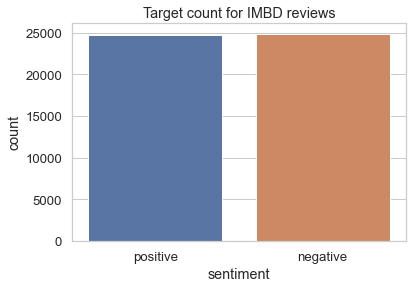

In [88]:
### Count Plot
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(data=df,x='sentiment')
plt.xticks(ticks = np.arange(2),labels = ['positive','negative'])
plt.title('Target count for IMBD reviews')
plt.show()

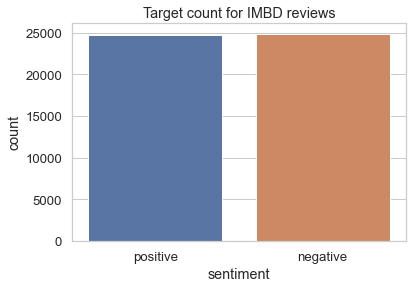

In [26]:
### Count Plot
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(data=df,x='sentiment')
plt.xticks(ticks = np.arange(2),labels = ['positive','negative'])
plt.title('Target count for IMBD reviews')
plt.show()

- Dataset is perfectly balanced

## Visualising the words using word cloud

### Positive reviews word cloud

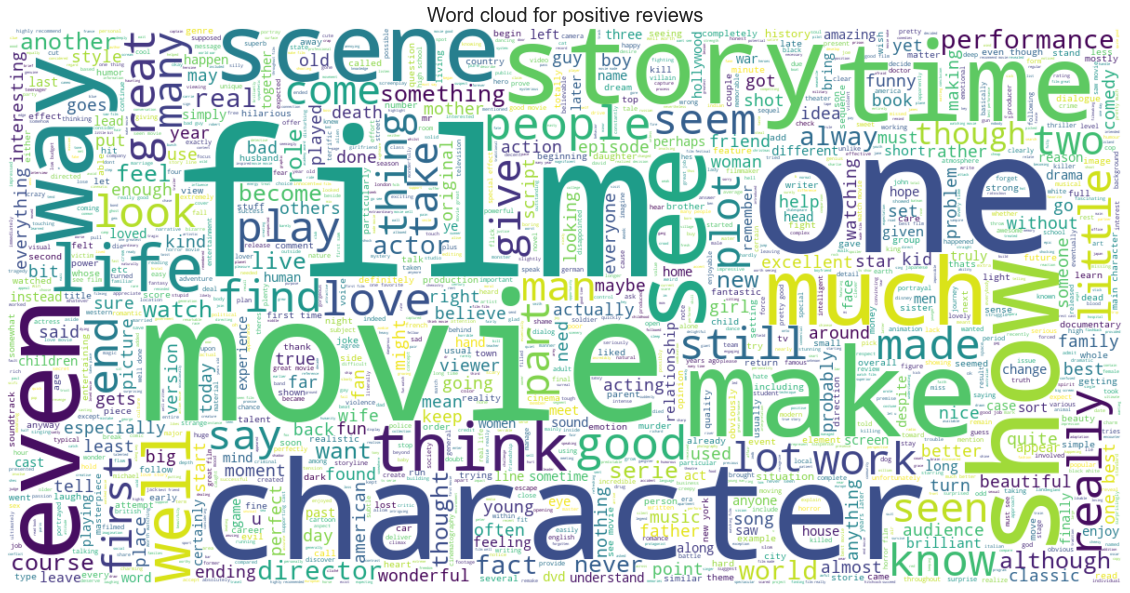

In [89]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['reviews']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

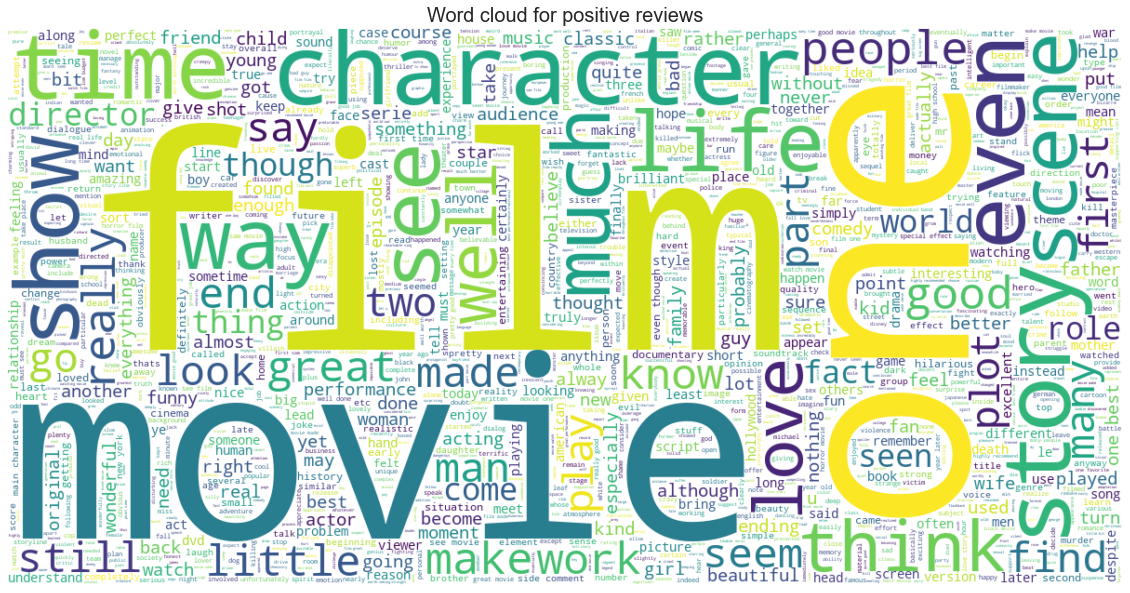

In [27]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['reviews']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()


<B>Observation:</b><BR>
- One, movie, character,film,story are the most frequent words in the positive reviews


### Negative reviews word cloud

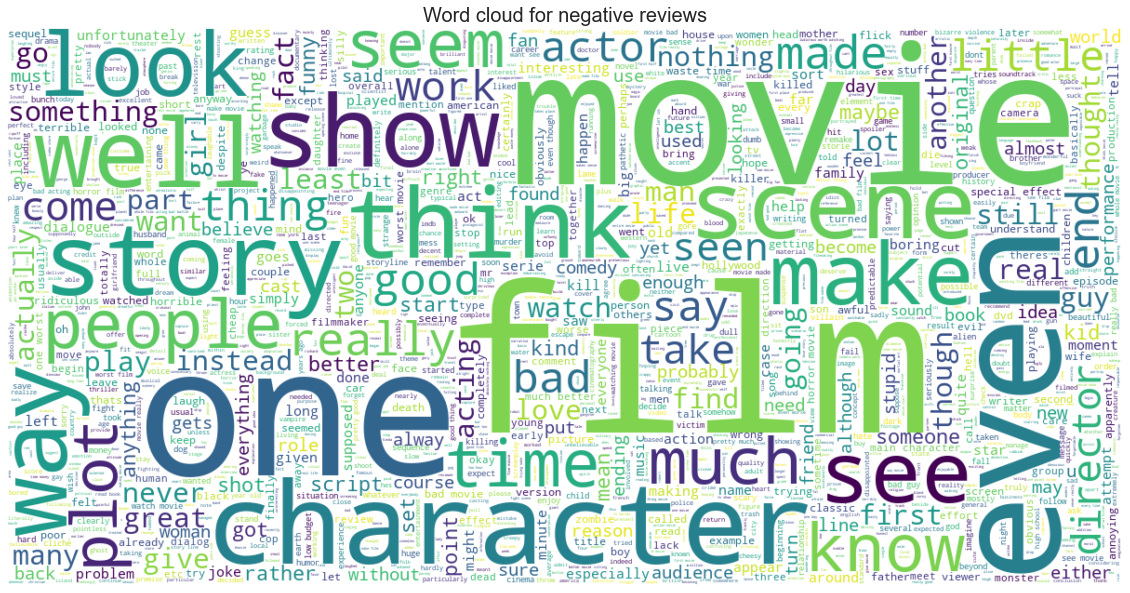

In [91]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['reviews']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()


<B>Observation:</b><BR>
- One, movie, character,film,story are the most frequent words in the negative reviews

<B>Observation:</b><BR>
- One, movie, character,film,story are the most frequent words in both the positive and negative reviews.Hence we can include this words in stopwords

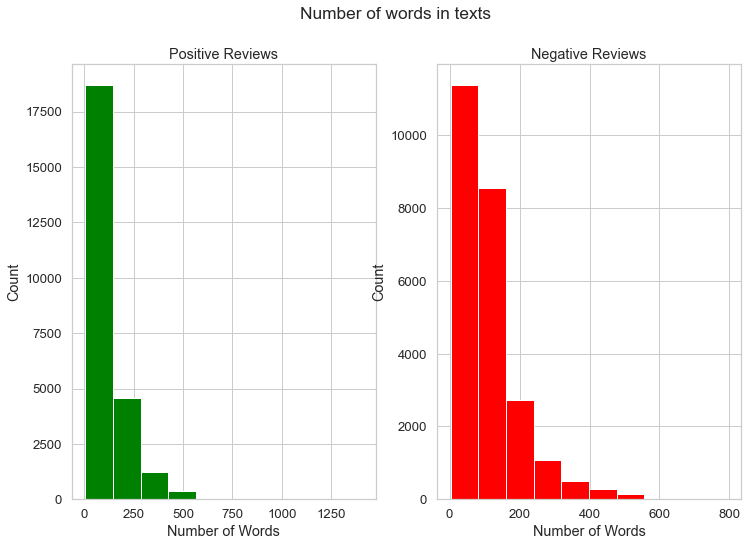

In [92]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

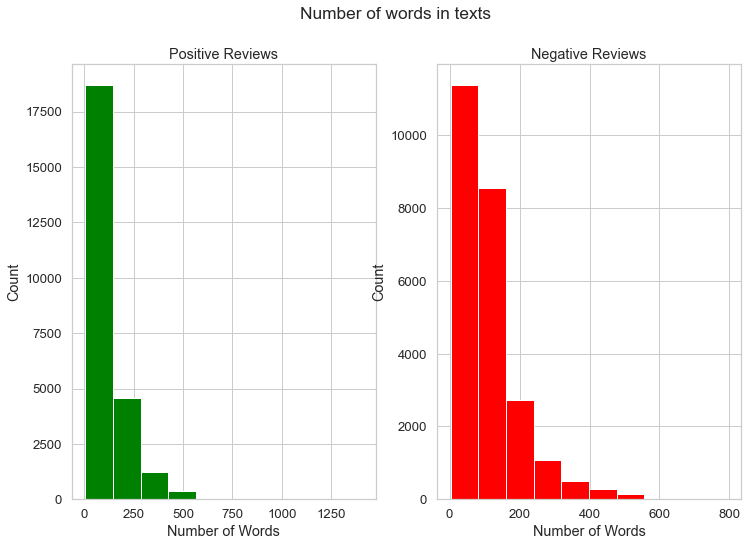

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

- Most of the reviws are having less than 250 words

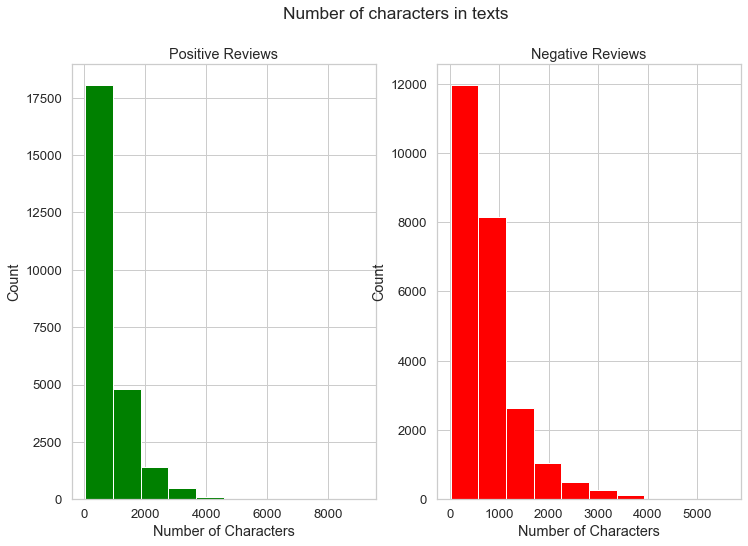

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

- Most of the reviws are having less than 2000 characters

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


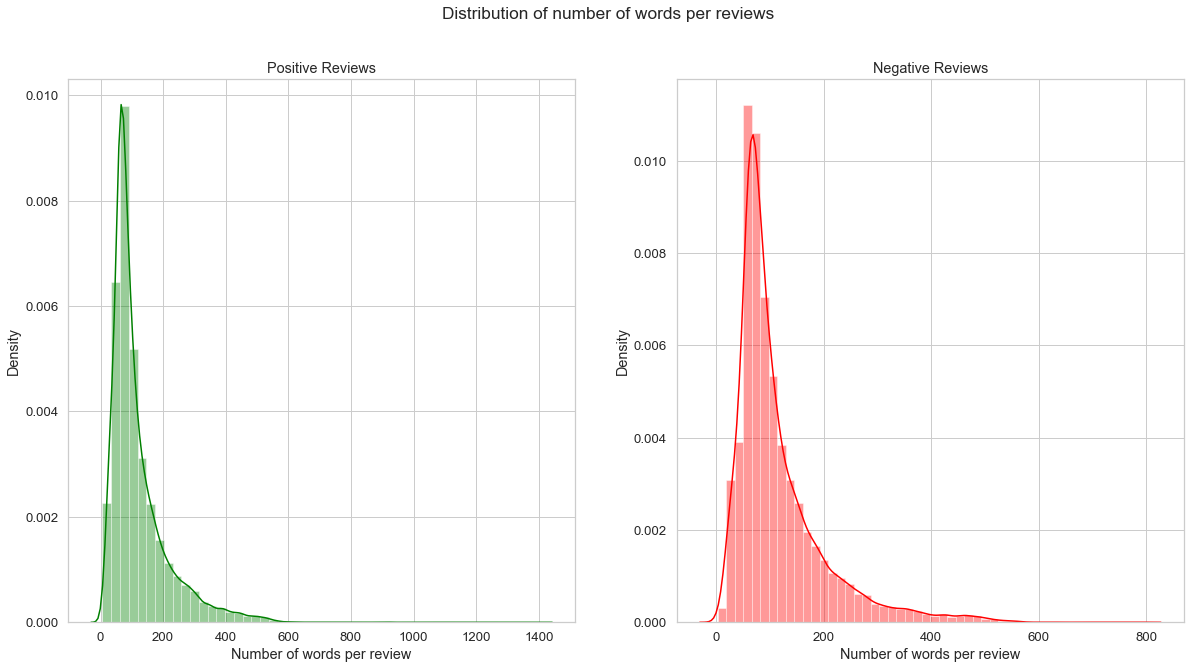

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


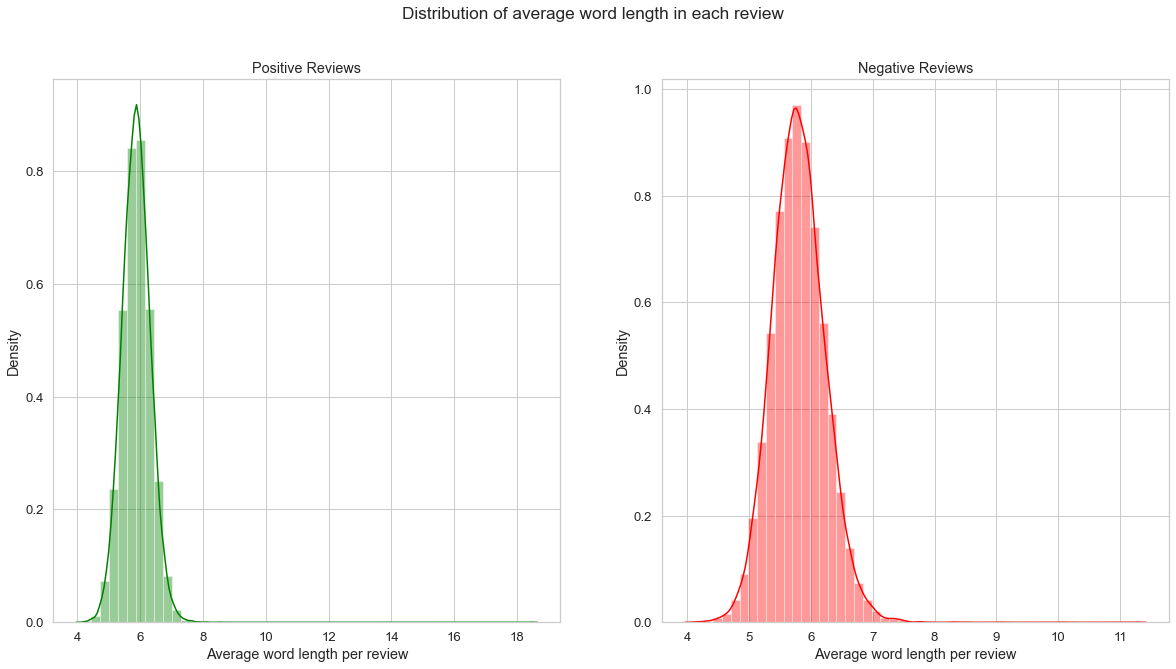

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

In [33]:
corpus = ' '.join(df['reviews']).split()

### Ploting most common unigrams, bigrams and trigrams

Text(0.5, 1.0, 'Most common unigrams')

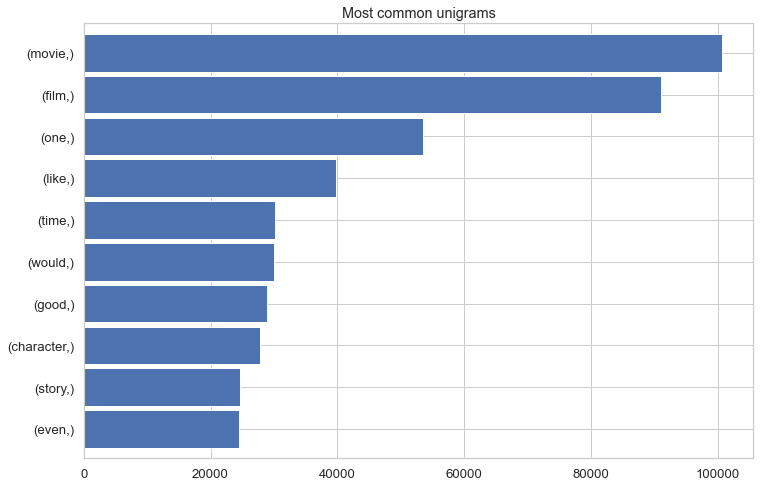

In [34]:
uni=(pd.Series(nltk.ngrams(corpus, 1)).value_counts())[:10]
uni.sort_values().plot.barh(width=.9, figsize=(12, 8))
plt.title('Most common unigrams')

Text(0.5, 1.0, 'Most common bigrams')

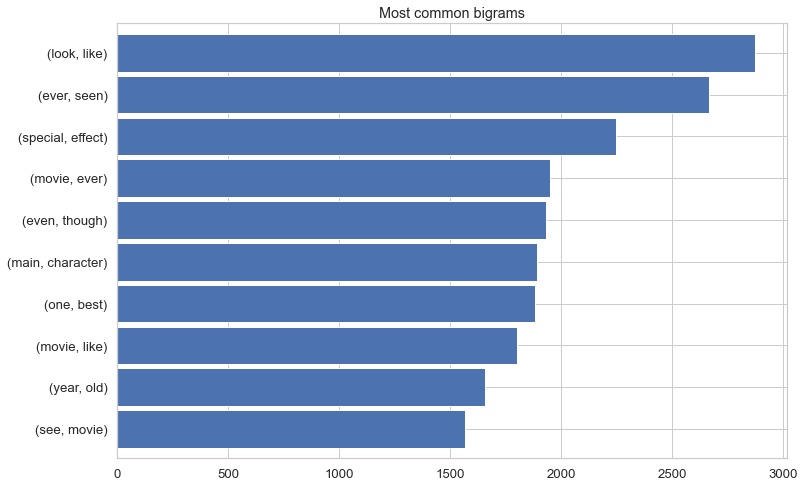

In [35]:
bigrams=(pd.Series(nltk.ngrams(corpus, 2)).value_counts())[:10]
bigrams.sort_values().plot.barh(width=.9, figsize=(12, 8))
plt.title('Most common bigrams')

Text(0.5, 1.0, 'Most common trigrams')

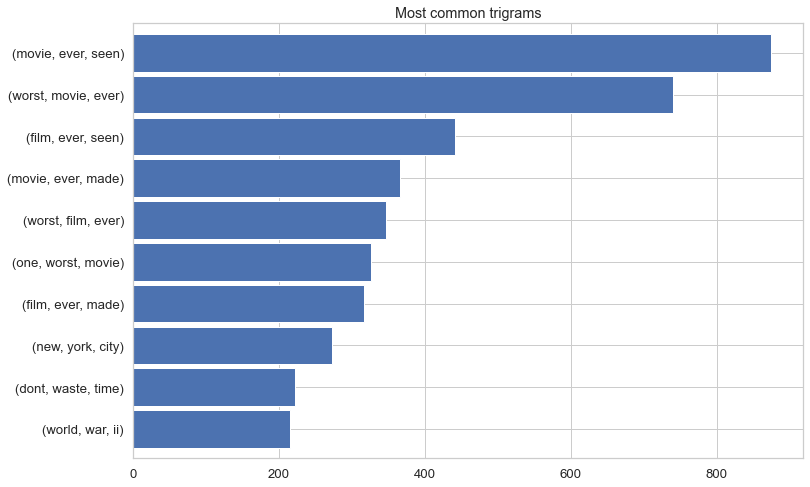

In [36]:
trigrams=(pd.Series(nltk.ngrams(corpus, 3)).value_counts())[:10]
trigrams.sort_values().plot.barh(width=.9, figsize=(12, 8))
plt.title('Most common trigrams')

### Train test split of the data

In [37]:
df_trn,df_tst=df[0:25000],df[25000:]
X_train,y_train=df_trn['reviews'],df_trn['sentiment']
X_test,y_test=df_tst['reviews'],df_tst['sentiment']

### Vectorizing data

In [38]:

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


count_vect = CountVectorizer() # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

## Logistic regression model

Logistic Regression Accuracy : 88.08%


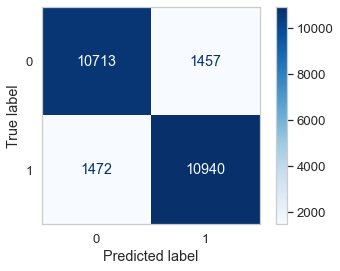

In [39]:
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
y_predict=lr.predict(X_test_tfidf)
s1=accuracy_score(y_test,y_predict)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

## Multinominal Naive Bayes model

Multinomial Naive Bayes Classifier Accuracy : 83.20%


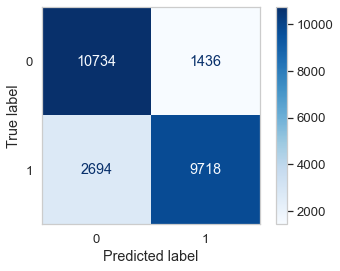

In [40]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)
y_predict=mnb.predict(X_test_tfidf)
s2=accuracy_score(y_test,y_predict)
print("Multinomial Naive Bayes Classifier Accuracy :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(mnb, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

## Linear SVM model

Linear Support Vector Classifier Accuracy : 87.57%


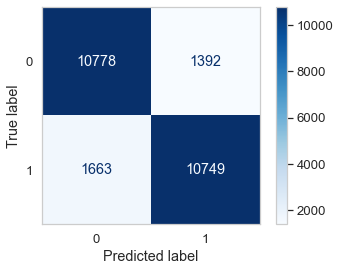

In [41]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(X_train_tfidf,y_train)
y_predict=linear_svc.predict(X_test_tfidf)
s3=accuracy_score(y_test,y_predict)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

### Explaining Classifier Predictions with Lime

In [42]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

y_pred_prob = lr.predict_proba(X_test_tfidf)[:, 1]
c = make_pipeline(tfidf_vect, lr)
mystring = list(X_test)[100] #Take a string from test instance
print(c.predict_proba([mystring])) #Prediction is a "negative" here. i.e., 0
# class_names = ["negative", "positive"] #negative, positive
explainer = LimeTextExplainer()
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
exp.as_list()

[[0.93598589 0.06401411]]


[('christian', -0.09811882041738369),
 ('unfortunately', -0.04460573095677153),
 ('awful', -0.036761816832967836),
 ('premise', -0.02855091241028347),
 ('poor', -0.025811641435273078),
 ('good', 0.024699130634292906)]

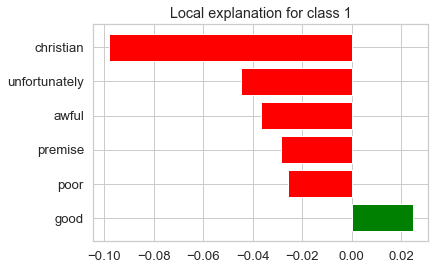

In [43]:
fig = exp.as_pyplot_figure()

In [44]:
mystring

'wife spotted film aisle local video store cover looked like sciencefiction film upon turning wife saw rebecca st james film realized christian movie suggested watch conservative evangelicals also know christian film poor reputation mainstream nevertheless decided give screening fair thing liked film musical score much orchestrated quite good cinematography also pretty good considering lowerbudget movie unfortunately virtue film production work lost regrettable script film begin interesting premise ufo abduction midway feature storyline veers wildly evangelistic crusade spearheaded movie two main character veers wildly treatise rapture least frank perettiinspired visitation deeply flawed film endgame tied together movie premise unidentified end nowhere even close started huge letdown acting supporting acting range decent awful rebecca st james play bit part passable part main character manned capably enough sadly talent wasted character onedimensional personality unbelievable protagoni

In [45]:
# y=pd.DataFrame(y_test)
# y[y['sentiment']==1]

In [46]:
# y.iloc[12500]

In [47]:
# SHAP

### Preparing the dataset for deeplearning model

In [48]:
#splitting into train and test
df_copy['reviews']=df_copy['reviews'].apply(clean_text,lemmatize = False)
#converting target variable to numerical value
# df_copy.sentiment = [ 1 if each == "positive" else 0 for each in data_copy.sentiment]
df_trn,df_tst=df_copy[0:25000],df[25000:]
X_train,y_train=df_trn['reviews'],df_trn['sentiment']
X_test,y_test=df_tst['reviews'],df_tst['sentiment']

### Plotting function

In [49]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig , ax = plt.subplots(1,2,figsize = (10,5))
  
  ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()
  ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  fig.tight_layout()
  plt.show()

In [50]:
#set up the tokenizer
MAX_WORDS = 10000
tokenizer = Tokenizer(num_words = MAX_WORDS, oov_token="<oov>") 
tokenizer.fit_on_texts(X_train)# Updates internal vocabulary based on a list of texts.
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  104572


In [51]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(X_train) # Transforms each text in texts to a sequence of integers.
seq_test =  tokenizer.texts_to_sequences(X_test)# Transforms each text in texts to a sequence of integers.

In [52]:
X_train[0]

0    story man unnatural feelings pig starts openin...
0    mr costner dragged movie far longer necessary ...
Name: reviews, dtype: object

In [53]:
print(seq_train[0])

[11, 49, 6882, 1206, 4246, 372, 491, 48, 1103, 331, 1548, 114, 1, 7192, 189, 544, 1934, 962, 2830, 780, 1, 4968, 337, 2445, 1548, 113, 9, 658, 1130, 691, 139, 1329, 8, 879, 544, 1, 281, 6, 26, 2014, 182, 623, 699, 1, 1539, 521, 44, 123, 28, 7, 474, 552, 20, 1, 1, 552, 264, 3272, 1, 1, 8161, 32, 3134]


In [54]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1406


In [55]:
max_seq_len=int(np.quantile(seq_len_list,0.95))
max_seq_len

302

- 95% of the data have <= 302 words

In [56]:
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [57]:
pad_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [58]:
#Splitting training set for validation purposes
X_train,X_val,y_train,y_val=train_test_split(pad_train,y_train,test_size=0.2,random_state=10)

### LSTM with its own embeddings

In [59]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(input_dim=V + 1, output_dim=D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
#     #early_stop = EarlyStopping(monitor='val_accuracy', 
#                                mode='min', 
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
  #  callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [60]:
D = 64 #embedding dims
epochs = 20
r,model,n_epochs = lstm_model(X_train,X_val,y_train,y_val,V,D,max_seq_len,epochs)

----Building the model----
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 302)]             0         
                                                                 
 embedding (Embedding)       (None, 302, 64)           6692672   
                                                                 
 batch_normalization (BatchN  (None, 302, 64)          256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 302, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 298, 32)           10272     
                                                                 
 dropout_1 (Dropout)         (None, 298, 32)           0         
                                  

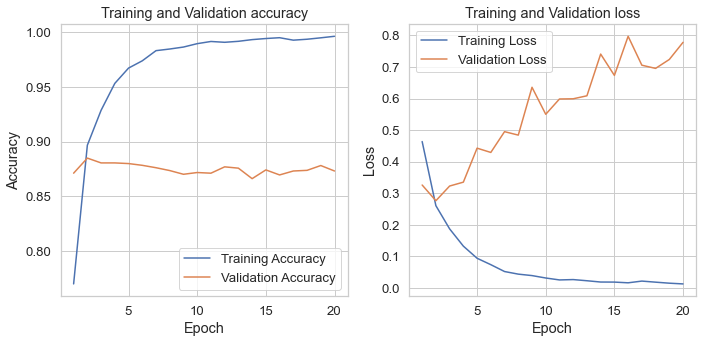

In [61]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

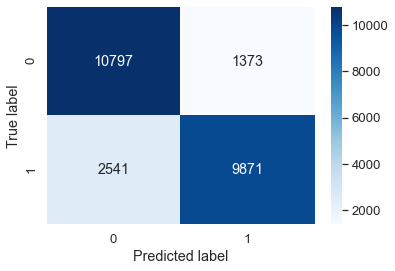

In [62]:
#Generate predictions for the test dataset
y_pred = model.predict(pad_test)
y_pred = y_pred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [63]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
769/769 [==============================] - 17s 22ms/step - loss: 1.0012 - accuracy: 0.8408
{'loss': 1.0012433528900146, 'accuracy': 0.8407778143882751}


In [64]:
# train_texts

## LSTM with glove embeddings

### Creating a dictionary of word embeddings from glove dataset

In [65]:
embeddings_dict = {}
with open(os.path.join(r"C:\Users\rajbo\Downloads\NLP\dataset\glove.6B\glove.6B.100d.txt"),encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = coefs

In [66]:
print('Found %s word embedding vectors in Glove' % len(embeddings_dict))

Found 400000 word embedding vectors in Glove


In [67]:
MAX_SEQUENCE_LENGTH = max_seq_len #301
MAX_NUM_WORDS = 10000 
EMBEDDING_DIM = 100 
VALIDATION_SPLIT = 0.2

In [68]:
# prepare embedding matrix - rows are the words from word_index, columns are the embeddings of that word from glove.
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# # load these pre-trained word embeddings into an Embedding layer


In [69]:
num_words

10001

In [70]:
EMBEDDING_DIM

100

In [71]:
epochs = 20

print("----Building the model----")
i = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = Embedding(num_words,EMBEDDING_DIM,
                        embeddings_initializer=Constant(embedding_matrix),
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False)(i) #note that we set trainable = False so as to keep the embeddings fixed
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv1D(32,5,activation = 'relu')(x)
x = Dropout(0.3)(x)
x = MaxPooling1D(2)(x)
x = Bidirectional(LSTM(128,return_sequences=True))(x)
x = LSTM(64)(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.summary()

#Training the LSTM
print("----Training the network----")
model.compile(optimizer= Adam(0.0005),
          loss='binary_crossentropy',
          metrics=['accuracy'])

#     #early_stop = EarlyStopping(monitor='val_accuracy', 
#                                mode='min', 
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
#  callbacks = [checkpoints,early_stop]
r = model.fit(X_train,y_train, 
              validation_data = (X_val,y_val), 
              epochs = epochs, 
              verbose = 2,
              batch_size = 32)
              #callbacks = callbacks
print("Train score:", model.evaluate(X_train,y_train))
print("Validation score:", model.evaluate(X_val,y_val))
n_epochs = len(r.history['loss'])


----Building the model----
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 302)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 302, 100)          1000100   
                                                                 
 batch_normalization_1 (Batc  (None, 302, 100)         400       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 302, 100)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 298, 32)           16032     
                                                                 
 dropout_4 (Dropout)         (None, 298, 32)           0         
                                

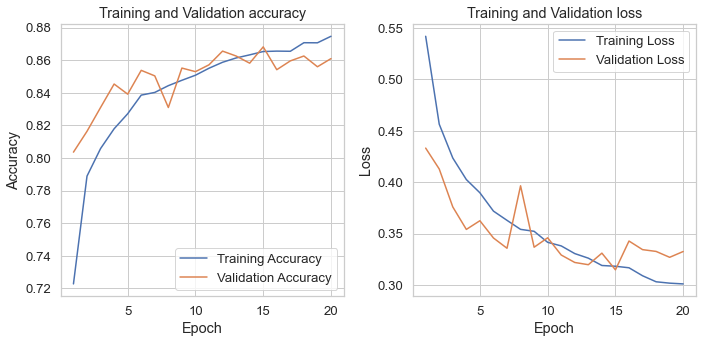

In [72]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

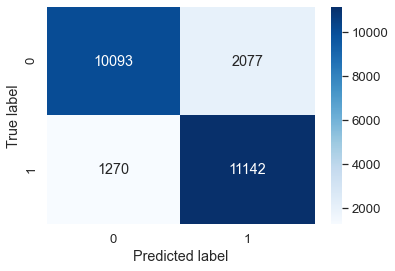

In [73]:
#Generate predictions for the test dataset
y_pred = model.predict(pad_test)
y_pred = y_pred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [74]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
769/769 [==============================] - 19s 25ms/step - loss: 0.3204 - accuracy: 0.8638
{'loss': 0.32036805152893066, 'accuracy': 0.8638434410095215}


In [75]:
stop here

SyntaxError: invalid syntax (<ipython-input-75-a96ba3aab008>, line 1)

## BERT modelling

In [ ]:
df_trn,df_tst=df_copy[0:500],df_copy[25000:]
X_train,y_train=df_trn['reviews'],df_trn['sentiment']
X_test,y_test=df_tst['reviews'],df_tst['sentiment']
#Splitting training set for validation purposes
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=10)

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
DATASET_ENCODING = "ISO-8859-1"

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = Dense(1, activation='sigmoid', name="output")(l)


# Use inputs and outputs to construct a final model
model = Model(inputs=[text_input], outputs = [l])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=128, epochs=1, verbose=2)

In [ ]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))

In [ ]:
#Generate predictions for the test dataset
y_pred = model.predict(X_test[0:100])
y_pred = y_pred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test[0:100], y_pred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Summary:
- We have tried Logistic,MNB,and Linear SVM, LSTM with or without pretrained embeddings and BERT with preptrained models
- Logistic regression is performing well among all the models.
- If we do some hyperparameter and run the model with more number of epochs deeplearning models may outperform well

In [ ]:
DASDRYTUYIUOIPO[P][\]

In [ ]:
print('Define a 1D CNN model.')

cnnmodel = Sequential()
# cnnmodel.add(Input(shape=(MAX_SEQUENCE_LENGTH,)))
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set. 
cnnmodel.fit(X_train, y_train,
          batch_size=128,
          epochs=1, validation_data=(X_val, y_val))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(X_test, y_test)
print('Test accuracy with CNN:', acc)

In [ ]:
# # 1D CNN model with training your own embedding
# y_train_cnn = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test_cnn = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
print("Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings")
cnnmodel = Sequential()
cnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set. 
cnnmodel.fit(x_train, y_train,
          batch_size=128,
          epochs=1, validation_data=(x_val, y_val))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(X_test, y_test)
print('Test accuracy with CNN:', acc)